# Chapter 4: Spark
## Lab assignment: Exercises with MapReduce on Apache Spark

The aim of this notebook is to start working with the RDD API of Apache Spark, aiming to solve the same MapReduce exercises we did in Chapter 2 (MapReduce). The lab assignments are categorized into three levels:

* [Basic](#Part-I---Basic-exercises)
* [Intermediate](#Part-II---Intermediate-level-exercises)
* [Advanced](#Part-III---Advanced-exercices)

Note that in Chapter 2, we solved the exercises at a conceptual level, tackling most exercises with **a single Map followed by a single Reduce function**. In Spark, we may be able to concatenate multiple `map` (or `flatMap`) functions to transform the input data into what we want, letting Spark optimize the whole job, which is going to be easier (and more efficient) to implement. Moreover, we will have a lot more functions available apart from Map and Reduce.

## Set-up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=a08f02e3c886670b39d812ab4d09615ceac97421eceb0b311433ec72a2d5b1d9
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


Remember that you need Spark installed in your Python environment (see the Appendix for a complete tutorial).

The first thing we need to do to start working with Spark is to initialize the `SparkContext`. We will also import a few libraries we will use.

In [3]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster("local[*]").setAppName("Spark Lab")
sc = SparkContext(conf = conf)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Helper function to test the correctness of the solutions
def test(var, val, msg=""):
    print("Test passed.") if var == val else print("Test failed. " + msg)

# Useful tips for programming exercises

When programming in Spark with Jupyter Notebooks it is useful to make use of its interactivity. That is, instead of addressing the exercise as a whole, try to divide it into smaller pieces and program it incrementally, checking that every step is being performed as expected.

To illustrate this, we are going to implement the Word Count program step by step, and you will later be asked to put everything together as part of Exercise 0.

We already know that to count words we need to first divide each sentence (string) of the RDD into words. But before that, we should read the data from a file. We can implement a simple function that takes the filename (and its path) as input, and creates an RDD with it. To check that this works, we could use a `take` action right after loading the file and see the first 10 lines of the file. Let's do this.

In [5]:
# First step, check the reading
quixote_path = "/content/drive/MyDrive/HW02/data/quixote.txt"
def word_count(file_path):
    lines = sc.textFile(file_path) # RDD

    output = lines.take(10) # trigger the reading of the file
    return output

# Test the function with quixote.txt file
word_count(quixote_path)

['',
 'The Project Gutenberg EBook of The History of Don Quixote by Miguel de Cervantes',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: The History of Don Quixote']

Doing this allows us to see the first 10 elements from the RDD, so we can understand that each element is a string containing a line of the book.

The next step is to divide those lines into words using the `split` function for Strings from Python.

In [6]:
# Next, we check the split
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.map(lambda line: line.split(' '))

    output = words.take(10)
    return output

# Test the function with quixote.txt file
word_count(quixote_path)

[[''],
 ['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'The',
  'History',
  'of',
  'Don',
  'Quixote',
  'by',
  'Miguel',
  'de',
  'Cervantes'],
 [''],
 ['This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with'],
 ['almost',
  'no',
  'restrictions',
  'whatsoever.',
  '',
  'You',
  'may',
  'copy',
  'it,',
  'give',
  'it',
  'away',
  'or'],
 ['re-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included'],
 ['with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org'],
 [''],
 [''],
 ['Title:', 'The', 'History', 'of', 'Don', 'Quixote']]

Well, in this case, we get a new RDD composed of lists. Is this what we need? Not really, we want an RDD of words. So looking at that output we can see that we should change something. You may recall that `split` returns a list of words that is split by the character given as argument. Hence, if we just want the words in the RDD we must use `flatMap` instead of `map`.

In [7]:
# Next, we check the split
def word_count(file_path):
    lines = sc.textFile(file_path)
    words = lines.flatMap(lambda line: line.split(' '))

    output = words.take(10)
    return output

# Test the function with quixote.txt file
word_count(quixote_path)

['',
 'The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'History',
 'of',
 'Don']

Brilliant! Much better now. What is left to finish this? We will ask you to think about it in the next section.

In summary, all exercises can usually be implemented incrementally, which eases finding bugs and problems. If we tried to program the whole Word Count and tested it at the end, we might get an error and could spend much more time trying to correct it and looking to understand where the error comes from. We suggest you test each step of the way to ensure that you are getting what you expect.

# Part I - Basic exercises

## Exercise 0: Word Count with Spark

Let's now implement the complete Word Count program in Spark, considering a few additional things we may need when working with real data. Thus, you're asked to implement a `word_count(file_path)` function that counts the number of words in a document or a number of text documents provided in the input path. The function `word_count(file_path)` should give as an output the 10 most repeated words in descending order of repetitions.

**Input:** Text Document or documents

**Output:** (word, count) - only the 10 words with the highest frequency!

Recommended steps:
1. Read the file or files. Each line should be an element of the RDD. (*transformation*)
2. Split the lines into words. (*transformation*)
3. Filter empty words ('') resulting from previous steps. (*transformation*)
4. Count the number of occurrences of each word. (*transformation*)
5. Return to the driver program the 10 most repeated words. (*action*)

In [8]:
def word_count(file_path):
    # <FILL-IN WITH YOUR CODE>
    lines = sc.textFile(quixote_path)
    words = lines.flatMap(lambda line: line.split(' '))
    words = words.filter(lambda word: word != '')
    words_counts = words.map(lambda word: (word, 1))
    words_counts = words_counts.reduceByKey(lambda x, y: x+y)
    output = words_counts.takeOrdered(10, lambda t: -t[1])
    return output


# Test the function with quixote.txt file
word_count(quixote_path)

[('the', 20923),
 ('and', 16606),
 ('to', 13492),
 ('of', 12866),
 ('that', 7164),
 ('a', 7003),
 ('in', 6860),
 ('I', 5756),
 ('he', 5640),
 ('for', 4534)]

The program should pass the following test:

In [9]:
top10_quixote = word_count(quixote_path)
print(top10_quixote)
test(top10_quixote, [('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866),
                                  ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640),
                                  ('for', 4534)], "Try again!")

[('the', 20923), ('and', 16606), ('to', 13492), ('of', 12866), ('that', 7164), ('a', 7003), ('in', 6860), ('I', 5756), ('he', 5640), ('for', 4534)]
Test passed.


### Improving Word Count (I): removing punctuation symbols

It seems like the previous Word Count function is working properly, but there are still many things we can do to improve it. Let's start by removing punctuation symbols. When they are attached to the words, we are counting them as different words (e.g., 'hello,' is different from 'hello').

Use the `remove_punctuation_symbols(text)` function to count all words the same regardless of capitalization, punctuation marks, etc.

Steps to follow:
1. Read the file. Each line is an element of the RDD.
2. Remove punctuation marks. (***New***)
2. Divide the lines into words.
3. Filter out empty words.
4. Count occurrences of each word.
5. Return the 10 most repeated words to the driver.

In [10]:
import re
def remove_punctuation_symbols(text):
    """This function converts the string to lower case and removes punctuation symbols and extra spaces"""
    accepted_chars = re.compile(r'[^0-9a-zA-Z]+')
    text = accepted_chars.sub(' ', text.lower()).strip()
    return text

The above function removes punctuation symbols and each letter is converted lower case. Let's test a couple of examples:

In [11]:
remove_punctuation_symbols('Hi! How are you?')

'hi how are you'

In [12]:
remove_punctuation_symbols(' Removing_all*kind^of+punctuations and extra       spaces     ')

'removing all kind of punctuations and extra spaces'

In [13]:
def word_count(filePath):
    # <FILL-IN WITH YOUR CODE>
    lines = sc.textFile(quixote_path)
    lines = lines.map(lambda line: remove_punctuation_symbols(line))
    words = lines.flatMap(lambda line: line.split(' '))
    words = words.filter(lambda word: word != '')
    words_counts = words.map(lambda word: (word, 1))
    words_counts = words_counts.reduceByKey(lambda x, y: x+y)
    output = words_counts.takeOrdered(10, lambda k_v: -k_v[1])
    return output

word_count(quixote_path)

[('the', 22471),
 ('and', 17722),
 ('to', 14006),
 ('of', 13491),
 ('that', 7993),
 ('in', 7335),
 ('a', 7287),
 ('i', 6653),
 ('he', 6157),
 ('it', 5680)]

In [14]:
top10_quixote = word_count(quixote_path)
test(top10_quixote, [('the', 22471), ('and', 17722), ('to', 14006), ('of', 13491), ('that', 7993),
                                 ('in', 7335), ('a', 7287), ('i', 6653), ('he', 6157), ('it', 5680)],
                  'Try again!')

Test passed.


### Improving Word Count (II): removing stop words

We are now better at counting words after removing the punctuation symbols, but we can see that the most repeated words are meaningless, in the sense that they are just words that do not provide any useful information about the text itself. In fact, these are known as [stop words](https://en.wikipedia.org/wiki/Stop_word).

Here is a list of common English stop words:

In [15]:
stop_words = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there',
              'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they',
              'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
              'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who',
              'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below',
              'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me',
              'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our',
              'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she',
              'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',
              'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then',
              'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not',
              'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too',
              'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't',
              'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it',
              'how', 'further', 'was', 'here', 'than']

Use this list to remove this words from our RDD to avoid counting them.

In [16]:
def word_count(filePath):
    # <FILL-IN WITH YOUR CODE>
    lines = sc.textFile(quixote_path)
    lines = lines.map(lambda line: remove_punctuation_symbols(line))
    words = lines.flatMap(lambda line: line.split(' '))
    words = words.filter(lambda word: word != '')
    words = words.filter(lambda word: word not in stop_words)
    words_counts = words.map(lambda word: (word, 1))
    words_counts = words_counts.reduceByKey(lambda x, y: x+y)
    output = words_counts.takeOrdered(10, lambda k_v: -k_v[1])
    return output

word_count(quixote_path)

[('said', 2627),
 ('quixote', 2327),
 ('sancho', 2205),
 ('one', 1623),
 ('would', 1251),
 ('thou', 1229),
 ('say', 904),
 ('good', 889),
 ('may', 855),
 ('see', 774)]

In [17]:
top10_quixote = word_count(quixote_path)
test(top10_quixote, [('said', 2627), ('quixote', 2327), ('sancho', 2205), ('one', 1623), ('would', 1251),
                                  ('thou', 1229), ('say', 904), ('good', 889), ('may', 855), ('see', 774)],
                  'Try again!')

Test passed.


You will notice that there are still several words that are typically found in books (like said, say,...). You can still add new unwanted words to the list of stop words to get more meaningful words only. This is an example of how we can incrementally improve our initial solution. In reality, whether removing words is required or not would be just a requisite defined by the specific application you are working on.

## Exercise 1. Histogram of word repetition

Provide a histogram of word repetitions, that is, the number of words that are repeated X times:

* 1 time - 3 words
* 2 times - 10 words
* 3 times, 20 words
...

You are asked to implement a `histogram_reps(file_path)` function in Spark that **must not** use the function `word_count(file_path)`, but it could use part of the code you did before. All the processing must be done with RDDs, and there should be a single `collect()` at the end to return a list. The list must be ordered by the number of times. Recall removing punctuation symbols when computing the histogram (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: (X times, number of words)


In [21]:
def histogram_reps(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the lines from the text file
    lines = sc.textFile(file_path)
    # removing punctuation and symbols
    lines = lines.map(lambda line: remove_punctuation_symbols(line))
    # splitting the lines into words
    words = lines.flatMap(lambda line: line.split(' '))
    # removing empty words
    words = words.filter(lambda word: word != '')
    # count occurences of each word
    words_counts = words.map(lambda word: (word, 1))
    # count total occurences of each word using filer
    words_counts = words_counts.reduceByKey(lambda x, y: x+y)
    # count how many words have been repeated how many times
    histogram_rdd = words_counts.map(lambda word: (word[1], 1))
    # reduce the words by counting all the 1
    # reduceByKey will handle the shuffle
    histogram_rdd = histogram_rdd.reduceByKey(lambda x, y: x+y)
    # collect the output
    output = histogram_rdd.collect()
    # sort the output
    output.sort(key=lambda x: x[0])
    return output

histogram_reps(quixote_path)[:20] # look at the first 20 results

[(1, 6303),
 (2, 2469),
 (3, 1382),
 (4, 903),
 (5, 688),
 (6, 511),
 (7, 367),
 (8, 340),
 (9, 239),
 (10, 207),
 (11, 171),
 (12, 199),
 (13, 135),
 (14, 132),
 (15, 118),
 (16, 106),
 (17, 94),
 (18, 100),
 (19, 79),
 (20, 74)]

The program should pass the following test:

In [22]:
hist_quixote = histogram_reps(quixote_path)
test(hist_quixote[:10],[(1, 6303), (2, 2469), (3, 1382), (4, 903), (5, 688), (6, 511), (7, 367), (8, 340),
                                     (9, 239), (10, 207)], "Try again!")

Test passed.


You could plot this with the matplotlib library:

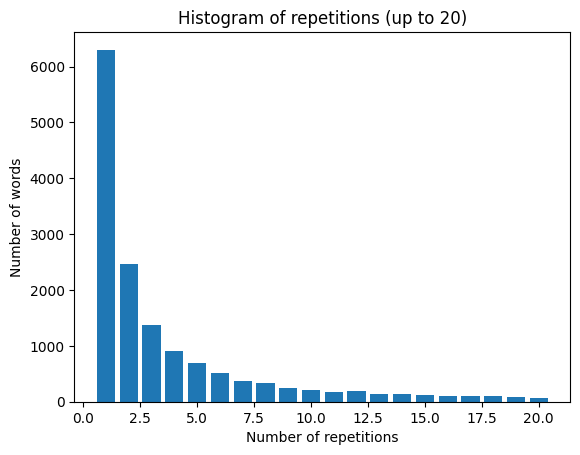

In [23]:
(x_values, y_values) = zip(*hist_quixote[:20])
plt.bar(x_values, y_values)
plt.title('Histogram of repetitions (up to 20)')
plt.xlabel('Number of repetitions')
plt.ylabel('Number of words')
plt.show()

## Exercise 2. Histogram of the length of the words

Provide a histogram of the length of the words. Word repetition is not a problem, so if you have the word 'bye' twice in your document, you would add 2 to the number of words of length 3.

* Length 1 - 100 times
* Length 2 - 300 times
* Length 3 - 400 times
...

You are asked to implement a `histogram_length(file_path)` function in Spark. All the processing must be done with RDDs, and there should be a single `collect()` at the end to return a list. The list must be ordered by the length of the words. Recall removing punctuation symbols when computing the histogram (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: (Length, number of words)

**Note: We are going to assume that the maximum word length is 16 characters, so anything above that shouldn't appear in the result.**

In [24]:
def histogram_length(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the lines from the text file
    lines = sc.textFile(file_path)
    # removing punctuation and symbols
    lines = lines.map(lambda line: remove_punctuation_symbols(line))
    # splitting the lines into words
    words = lines.flatMap(lambda line: line.split(' '))
    # removing empty words
    words = words.filter(lambda word: word != '')
    # removing words greater than length 16
    words = words.filter(lambda word: len(word) <= 16)
    # count occurences of each word length
    words_length_counts = words.map(lambda word: (len(word), 1))
    # count total occurences of each word length
    histogram_word_length_count = words_length_counts.reduceByKey(lambda x, y: x+y)
    # collect the output
    output = histogram_word_length_count.collect()
    # sort the output
    output.sort(key=lambda x: x[0])
    return output

histogram_length(quixote_path)

[(1, 16557),
 (2, 86007),
 (3, 104061),
 (4, 85836),
 (5, 42352),
 (6, 34381),
 (7, 29737),
 (8, 15982),
 (9, 10454),
 (10, 6409),
 (11, 2516),
 (12, 1210),
 (13, 482),
 (14, 152),
 (15, 60),
 (16, 7)]

The program should pass the following test:

In [25]:
length_quixote = histogram_length(quixote_path)
print(length_quixote)
test(length_quixote, [(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737),
                                   (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152),
                                   (15, 60), (16, 7)],"Try again!")

[(1, 16557), (2, 86007), (3, 104061), (4, 85836), (5, 42352), (6, 34381), (7, 29737), (8, 15982), (9, 10454), (10, 6409), (11, 2516), (12, 1210), (13, 482), (14, 152), (15, 60), (16, 7)]
Test passed.


**Task:** Use the previous example to draw the histogram with matplotlib.

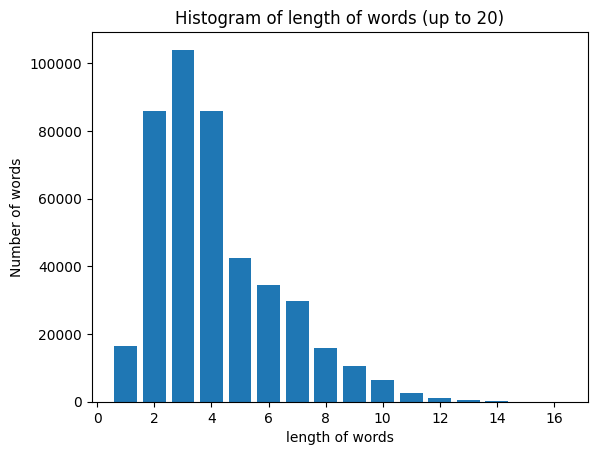

In [28]:
# <FILL-IN WITH YOUR CODE>
(x_values, y_values) = zip(*length_quixote[:20])
plt.bar(x_values, y_values)
plt.title('Histogram of length of words (up to 20)')
plt.xlabel('length of words')
plt.ylabel('Number of words')
plt.show()

## Exercise 3. Average length of the words in a document

You are now asked to implement an `average_length(file_path)` function in Spark that provides the average length of the words in a document or documents. All the processing must be done with RDDs, and the last instruction must be the only one returning a result to the driver. Recall removing punctuation symbols before computing the average (but don't remove stop words).

**Input**: A text document or multiple text documents

**Output**: Average length of the words

**Note: Again, we are going to assume that the maximum word length is 16 characters, so anything above that shouldn't be used to compute the average**


You can do it in two different ways (you can try both and check possible differences):

- **Option 1**. As we have done in Chapter 2 (MapReduce): you will need to get the total length of the words in the text and the total number of words in just one MapReduce job. Then, you just need to make the division.

In [40]:
def average_length(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the lines from the text file
    lines = sc.textFile(file_path)
    # removing punctuation and symbols
    lines = lines.map(lambda line: remove_punctuation_symbols(line))
    # splitting the lines into words
    words = lines.flatMap(lambda line: line.split(' '))
    # removing empty words
    words = words.filter(lambda word: word != '')
    # removing words greater than length 16
    words = words.filter(lambda word: len(word) <= 16)
    # count occurences of each word length
    words_length_counts = words.map(lambda word: (len(word), 1))
    # count total occurences of each word length and total words
    words_length_counts = words_length_counts.reduce(lambda x, y: (x[0]+y[0], x[1]+y[1]))
    if(words_length_counts[1] == 0):
      return 0
    else:
      return words_length_counts[0]/words_length_counts[1]

average_length(quixote_path)

4.144714731443846

The program should pass the following test:

In [41]:
avg = average_length(quixote_path)
test(round(avg,5), 4.14471, 'Try again!')

Test passed.


- **Option 2**. Using some built-in functions from Spark: you can think of a function available from Spark API that can simplify the implementation.

In [42]:
def average_length(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the lines from the text file
    lines = sc.textFile(file_path)
    # remove punctuation and symbols, splitting the words in the line and filter based on the length
    words = (
        lines.flatMap(lambda line: remove_punctuation_symbols(line).split(' '))
        .filter(lambda word: word != '' and len(word)<=16)
    )
    # using aggregrate function
    result = words.aggregate((0, 0), lambda total_word_length, word: (total_word_length[0] + len(word), total_word_length[1] + 1),
                             lambda partition_1, partition_2: (partition_1[0] + partition_2[0], partition_1[1] + partition_2[1]))

    if(result[1] == 0):
      return 0
    else:
      return result[0]/result[1]

average_length(quixote_path)

4.144714731443846

The program should pass the following test:

In [43]:
avg = average_length(quixote_path)
test(round(avg, 5), 4.14471, 'Try again!')

Test passed.


# Part II - Intermediate level exercises

## Exercise 6. Mutually linked URLs

Obtain a list of mutually linked URLs. That is, you need to find which URLs are mutually linking each other in their webpage content.

You are asked to implement a function `mutually_linked(file_path)` that reads a file that contains a list of URLs for each URL indicating which URLs are referred in each webpage. The function should find which URLs are being mutually linked.

**Input**: A file with the following format: URL -> List of URLs.

    URL_1 -> URL_2 URL_4
    URL_2 -> URL_1 URL_3 URL_4 URL_5 URL_6
    URL_3 -> URL_2 URL_5 URL_6
    URL_4 -> URL_2 URL_3 URL_5
    URL_5 -> URL_2 URL_3 URL_4
    URL_6 -> URL_2 URL_4

**Output**: (pair of mutually linked URLs)

    (URL_1 URL_2)
    (URL_2 URL_3)
    (URL_2 URL_4)
    (URL_2 URL_5)
    (URL_2 URL_6)
    (URL_3 URL_5)
    (URL_4 URL_5)


Recommended steps:

- Parse the input file to create an RDD of tuples like this:

```
[('URL_1', ['URL_2', 'URL_4']),
 ('URL_2', ['URL_1', 'URL_3', 'URL_4', 'URL_5', 'URL_6']),
 ('URL_3', ['URL_2', 'URL_5', 'URL_6']),
 ('URL_4', ['URL_2', 'URL_3', 'URL_5']),
 ('URL_5', ['URL_2', 'URL_3', 'URL_4']),
 ('URL_6', ['URL_2', 'URL_4'])]
```

- For each one of these, you could use a function to create a list of tuples that look like this:

```
[(('URL_1', 'URL_2'), 1),
 (('URL_1', 'URL_4'), 1),
 (('URL_1', 'URL_2'), 1)]
```




**Note**:  Make sure you sort the tuples that will be acting as keys. Lists cannot be used as keys in Spark because they are mutable. When you sort a tuple with `sorted`, you will get a list, which must be converted back to a tuple.

In [44]:
urls_file_path = "/content/drive/MyDrive/HW02/data/urls.txt"

In [62]:
# <FILL-IN WITH YOUR CODE>
def read_file_remove_arrow(file_path):
  # read the file
  lines = sc.textFile(file_path)
  # remove arrows
  arrowless_lines = lines.map(lambda line: line.split('->')).map(lambda line: (line[0].strip(), line[1].strip().split(' ')))
  return arrowless_lines

result = read_file_remove_arrow(urls_file_path)
print(result.collect())

[('URL_1', ['URL_2', 'URL_4']), ('URL_2', ['URL_1', 'URL_3', 'URL_4', 'URL_5', 'URL_6']), ('URL_3', ['URL_2', 'URL_5', 'URL_6']), ('URL_4', ['URL_2', 'URL_3', 'URL_5']), ('URL_5', ['URL_2', 'URL_3', 'URL_4']), ('URL_6', ['URL_2', 'URL_4'])]


In [68]:
def mutual_links(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the file and remove arrow
    urls_rdd = read_file_remove_arrow(file_path)
    # pair of mutually linked url, 1
    mutual_url_count = urls_rdd.flatMap(lambda url: [(tuple(sorted([url[0], other_url])), 1) for other_url in url[1]])
    # reduce by key
    mutual_url_count = mutual_url_count.reduceByKey(lambda x, y: x+y)
    # Filter to find only mutually linked URLs (where the count is exactly 2)
    mutual_links = mutual_url_count.filter(lambda pair: pair[1] == 2)
    # Extract the URL pairs (we don't need the count anymore)
    mutual_links_only = mutual_links.map(lambda pair: pair[0])
    return sorted(mutual_links_only.collect())

mutual_links(urls_file_path)

[('URL_1', 'URL_2'),
 ('URL_2', 'URL_3'),
 ('URL_2', 'URL_4'),
 ('URL_2', 'URL_5'),
 ('URL_2', 'URL_6'),
 ('URL_3', 'URL_5'),
 ('URL_4', 'URL_5')]

The program should pass the following test:

In [69]:
test(sorted(mutual_links(urls_file_path)), [('URL_1', 'URL_2'), ('URL_2', 'URL_3'), ('URL_2', 'URL_4'),
                                                    ('URL_2', 'URL_5'), ('URL_2', 'URL_6'), ('URL_3', 'URL_5'),
                                                    ('URL_4', 'URL_5')], 'Try again!')

Test passed.


## Exercise 7. Find a list of common friends between pairs of friends

Obtain a list of common friends for each pair of friends. That is, for each two people that are friends (assuming friendship is bi-directional), you need to find the friends in common.

You are asked to implement a function `common_friends(file_path)` that reads a file that contains a list of friends for each person. The function should output for each pair of friends, the list of common friends.

**Input**: A file with the following format: Person -> List of friends.

```
Isaac -> Mikel John Lucy
Mikel -> Isaac John Lucy Claudia
John -> Isaac Mikel Lucy Claudia
Lucy -> Isaac Mikel John Claudia
Claudia -> Mikel John Lucy
```

**Output**: (pair of friends, list of common friends)
```
(Isaac, Mikel)    -> (John, Lucy)
(Claudia, Mikel)  -> (John, Lucy)
(John, Lucy)      -> (Claudia, Isaac, Mikel)
(Isaac, John)     -> (Lucy, Mikel)
(Isaac, Lucy)     -> (John, Mikel)
(John, Mikel)     -> (Claudia, Isaac, Lucy)
(Lucy, Mikel)     -> (Claudia, Isaac, John)
(Claudia, John)   -> (Lucy, Mikel)
(Claudia, Lucy)   -> (John, Mikel)

```

You could follow similar steps to the ones in the previous exercise:

- Parse the input file to create an RDD of tuples like this:

```
[('Isaac', ['Mikel', 'John', 'Lucy']), ('Mikel', ['Isaac', 'John', 'Lucy', 'Claudia']), ('John', ['Isaac', 'Mikel', 'Lucy', 'Claudia']), ('Lucy', ['Isaac', 'Mikel', 'John', 'Claudia']), ('Claudia', ['Mikel', 'John', 'Lucy'])]
```

- For each one of these, we would recommend a function to create a list of tuples that looks like this:

```
[(('Isaac', 'Mikel'), ['Mikel', 'John', 'Lucy']),
 (('Isaac', 'John'), ['Mikel', 'John', 'Lucy']),
  (('Isaac', 'Lucy'), ['Mikel', 'John', 'Lucy'])
 ]
```

**Note**:  Make sure you sort the tuples that will be acting as keys. Lists cannot be used as keys in Spark because they are mutable. When you sort a tuple with `sorted`, you will get a list, which must be converted back to a tuple.

- You will have to aggregate those results by key and perform the final intersection of list of friends.

In [70]:
friends_file_path = "/content/drive/MyDrive/HW02/data/friends.txt"

In [71]:
# <FILL-IN WITH YOUR CODE>
def read_file_remove_arrow(file_path):
  # read the file
  lines = sc.textFile(file_path)
  # remove arrows
  arrowless_lines = lines.map(lambda line: line.split('->')).map(lambda line: (line[0].strip(), line[1].strip().split(' ')))
  return arrowless_lines

result = read_file_remove_arrow(friends_file_path)
print(result.collect())

[('Isaac', ['Mikel', 'John', 'Lucy']), ('Mikel', ['Isaac', 'John', 'Lucy', 'Claudia']), ('John', ['Isaac', 'Mikel', 'Lucy', 'Claudia']), ('Lucy', ['Isaac', 'Mikel', 'John', 'Claudia']), ('Claudia', ['Mikel', 'John', 'Lucy'])]


In [90]:
def common_friends(file_path):
    # <FILL-IN WITH YOUR CODE>
    # read the file and remove arrow
    friends_rdd = read_file_remove_arrow(file_path)
    # Create pairs of friends and associate each person with their list of friends
    # Sort the pair of friends so ('Isaac', 'Mikel') is the same as ('Mikel', 'Isaac')
    friend_pairs = friends_rdd.flatMap(lambda person_friends:
                                       [(tuple(sorted([person_friends[0], friend])), set(person_friends[1]))
                                        for friend in person_friends[1]])

    # Combine the friend lists for each pair of friends by intersecting the sets
    common_friends_rdd = friend_pairs.reduceByKey(lambda x, y: x.intersection(y))

    # Collect the results and sort them for easier readability
    result = common_friends_rdd.map(lambda pair: (pair[0], (sorted(pair[1])))).collect()
    return result


common_friends(friends_file_path)

[(('Isaac', 'Mikel'), ['John', 'Lucy']),
 (('Claudia', 'Mikel'), ['John', 'Lucy']),
 (('John', 'Lucy'), ['Claudia', 'Isaac', 'Mikel']),
 (('Isaac', 'John'), ['Lucy', 'Mikel']),
 (('Isaac', 'Lucy'), ['John', 'Mikel']),
 (('John', 'Mikel'), ['Claudia', 'Isaac', 'Lucy']),
 (('Lucy', 'Mikel'), ['Claudia', 'Isaac', 'John']),
 (('Claudia', 'John'), ['Lucy', 'Mikel']),
 (('Claudia', 'Lucy'), ['John', 'Mikel'])]

The program should pass the following test.

In [86]:
test(sorted(map(lambda t: (t[0], sorted(t[1])), common_friends(friends_file_path))),
                  sorted(map(lambda t: (t[0], sorted(t[1])), [(('Isaac', 'Mikel'), ['John', 'Lucy']),
                                                              (('Claudia', 'Mikel'), ['John', 'Lucy']),
                                                              (('John', 'Lucy'), ['Claudia', 'Isaac', 'Mikel']),
                                                              (('Isaac', 'John'), ['Lucy', 'Mikel']),
                                                              (('Isaac', 'Lucy'), ['John', 'Mikel']),
                                                              (('John', 'Mikel'), ['Claudia', 'Isaac', 'Lucy']),
                                                              (('Lucy', 'Mikel'), ['Claudia', 'Isaac', 'John']),
                                                              (('Claudia', 'John'), ['Lucy', 'Mikel']),
                                                              (('Claudia', 'Lucy'), ['John', 'Mikel'])])),
                  'Try again!')

Test passed.


You can now try your function with a bigger example generated by the following code (also using Spark). Feel free to change the parameters to generate anonimized persons and friends. Note that we are not storing the generated data into disk (we could do it with `saveAsTextFile`). Instead we are getting an RDD. Hence, you need to change the function to directly receive an RDD instead of a file path.

In [93]:
def get_random_friends(n_people, n_friends_mu, n_friends_std):
    n_friends = min(int(np.abs(np.random.randn()*n_friends_mu + n_friends_std)), n_people - 1)
    return " ".join(map(str, list(np.random.choice(n_people, n_friends, replace=False)) ))


def generate_random_friends(n_people, n_friends_mu, n_friends_std):
    rdd = sc.parallelize(range(n_people)) \
        .map(lambda person: str(person) + ' -> ' + get_random_friends(n_people, n_friends_mu, n_friends_std))
    return rdd
#     .saveAsTextFile('data/friends_big_spark.txt/')

friends_rdd = generate_random_friends(n_people=10000, n_friends_mu = 500, n_friends_std = 300)

We check the content of the RDD.

In [94]:
friends_rdd.take(2)

['0 -> 4 0 98 11 19 58 87 34 35 22 16 47 73 27 57 14 59 17 53 23 7 63 72 15 39 61 76 51 64 6 38 65 95 70 67 12 82 94 91 48 13 26 89 86 97 88 44 84 36 1 18 31 93 71 81 92 42 83 50 21 75 69 2 79 78 41 96 80 30 49 66 9 10 40 28 68 43 33 24 52 29 46 20 74 8 5 25 60 99 37 45 55 90 77 32 3 54 56 62',
 '1 -> 87 84 75 51 92 88 15 50 58 19 55 90 62 71 38 26 39 44 33 0 3 64 7 99 83 28 46 16 24 18 31 94 2 45 11 22 48 82 73 27 23 10 97 79 68 29 13 70 56 57 53 6 80 20 89 36 35 69 66 12 5 37 9 14 21 34 77 81 60 8 74 78 95 32 42 54 86 67 49 52 96 1 4 65 72 93 30 17 85 43 76 40 47 61 25 41 63 91 59']

Change the `common_friends` function to receive an RDD of text `lines` instead of the `file_path` and to return another RDD with the common friends.

In [95]:
def common_friends(lines):
    # <FILL-IN WITH YOUR CODE>
    #parse the input line remove arrow and map them with the list of friends
    friends_rdd = lines.map(lambda line: line.split('->')).map(lambda line: (line[0].strip(), line[1].strip().split(' ')))
     # Create pairs of friends and associate each person with their list of friends
    # Sort the pair of friends so ('Isaac', 'Mikel') is the same as ('Mikel', 'Isaac')
    friend_pairs = friends_rdd.flatMap(lambda person_friends:
                                       [(tuple(sorted([person_friends[0], friend])), set(person_friends[1]))
                                        for friend in person_friends[1]])

    # Combine the friend lists for each pair of friends by intersecting the sets
    output_rdd = friend_pairs.reduceByKey(lambda x, y: x.intersection(y)).map(lambda pair: (pair[0], (sorted(pair[1]))))
    return output_rdd

# Check it first with the simplest example
common_friends_rdd_small = common_friends(sc.textFile(friends_file_path))
common_friends_rdd_small.collect()

[(('Isaac', 'Mikel'), ['John', 'Lucy']),
 (('Claudia', 'Mikel'), ['John', 'Lucy']),
 (('John', 'Lucy'), ['Claudia', 'Isaac', 'Mikel']),
 (('Isaac', 'John'), ['Lucy', 'Mikel']),
 (('Isaac', 'Lucy'), ['John', 'Mikel']),
 (('John', 'Mikel'), ['Claudia', 'Isaac', 'Lucy']),
 (('Lucy', 'Mikel'), ['Claudia', 'Isaac', 'John']),
 (('Claudia', 'John'), ['Lucy', 'Mikel']),
 (('Claudia', 'Lucy'), ['John', 'Mikel'])]

Try it now with the larger set.

In [96]:
common_friends_rdd = common_friends(friends_rdd)
common_friends_rdd.take(2)

[(('0', '4'),
  ['0',
   '1',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '2',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '3',
   '30',
   '32',
   '33',
   '34',
   '35',
   '36',
   '37',
   '38',
   '39',
   '4',
   '40',
   '41',
   '42',
   '43',
   '44',
   '45',
   '46',
   '47',
   '48',
   '49',
   '5',
   '50',
   '51',
   '52',
   '53',
   '54',
   '55',
   '56',
   '57',
   '58',
   '59',
   '6',
   '60',
   '61',
   '62',
   '63',
   '64',
   '65',
   '66',
   '67',
   '68',
   '69',
   '7',
   '70',
   '71',
   '72',
   '73',
   '74',
   '75',
   '76',
   '77',
   '78',
   '79',
   '8',
   '80',
   '81',
   '82',
   '83',
   '84',
   '86',
   '87',
   '88',
   '89',
   '9',
   '90',
   '91',
   '92',
   '93',
   '94',
   '95',
   '96',
   '97',
   '98',
   '99']),
 (('0', '0'),
  ['0',
   '1',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
 

**Extra**: Can we recover the list of friends for each person from the result obtained in this exercise? Try it yourself. Is there any problem?

One may be tempted to implement the solution using the lists of common friends. It works for the smaller dataset, but it will take too long with a larger dataset.

In [103]:
# <FILL-IN WITH YOUR CODE>

def recover_friends(common_friends_rdd):
    # <FILL-IN WITH YOUR CODE>
    # Map each pair to individual friendships
    friend_pairs = common_friends_rdd.flatMap(lambda x: [(x[0][0], x[0][1]), (x[0][1], x[0][0])])
    # Aggregate friends by key to create a list of friends for each person
    output_rdd = friend_pairs.groupByKey().mapValues(lambda friends: list(set(friends)))

    return output_rdd

recover_friends(common_friends_rdd).collect()

[('0',
  ['18',
   '34',
   '14',
   '17',
   '50',
   '22',
   '8',
   '46',
   '37',
   '38',
   '72',
   '77',
   '48',
   '84',
   '68',
   '55',
   '13',
   '82',
   '41',
   '0',
   '43',
   '53',
   '29',
   '54',
   '49',
   '61',
   '39',
   '90',
   '12',
   '31',
   '63',
   '87',
   '15',
   '30',
   '88',
   '67',
   '73',
   '16',
   '56',
   '57',
   '95',
   '3',
   '71',
   '6',
   '93',
   '92',
   '47',
   '7',
   '83',
   '26',
   '59',
   '28',
   '98',
   '89',
   '23',
   '9',
   '42',
   '25',
   '66',
   '21',
   '40',
   '80',
   '78',
   '27',
   '91',
   '10',
   '62',
   '5',
   '79',
   '36',
   '11',
   '19',
   '58',
   '60',
   '51',
   '94',
   '4',
   '85',
   '69',
   '81',
   '24',
   '2',
   '44',
   '74',
   '99',
   '86',
   '64',
   '70',
   '45',
   '32',
   '96',
   '1',
   '35',
   '75',
   '52',
   '97',
   '65',
   '20',
   '33',
   '76']),
 ('4',
  ['18',
   '17',
   '34',
   '14',
   '50',
   '8',
   '22',
   '46',
   '37',
   '38',
   '7

You could now try with the larger dataset, but be careful, it won't end (or it will take too much time).

Using just the information in the keys you can recover the friend list of each person much faster. This is why it is important to think of the most efficient solution in Big Data.

In [104]:
# <FILL-IN WITH YOUR CODE>


def recover_friends(common_friends_rdd):
    # <FILL-IN WITH YOUR CODE>
    # Map each pair to individual friendships
    friend_pairs = common_friends_rdd.flatMap(lambda x: [(x[0][0], x[0][1]), (x[0][1], x[0][0])])
    # Aggregate friends by key to create a list of friends for each person
    output_rdd = friend_pairs.groupByKey().mapValues(lambda friends: list(set(friends)))
    return output_rdd

recover_friends(common_friends_rdd_small).collect()

[('Isaac', ['John', 'Mikel', 'Lucy']),
 ('Mikel', ['Claudia', 'John', 'Isaac', 'Lucy']),
 ('Claudia', ['John', 'Mikel', 'Lucy']),
 ('John', ['Claudia', 'Mikel', 'Isaac', 'Lucy']),
 ('Lucy', ['Claudia', 'John', 'Mikel', 'Isaac'])]

Check it now with the larger dataset.

In [105]:
%%time
common_friends_rdd = common_friends(friends_rdd)
recover_friends(common_friends_rdd).take(2)

CPU times: user 37.1 ms, sys: 4.36 ms, total: 41.4 ms
Wall time: 1.37 s


[('0',
  ['18',
   '34',
   '14',
   '17',
   '50',
   '22',
   '8',
   '46',
   '37',
   '38',
   '72',
   '77',
   '48',
   '84',
   '68',
   '55',
   '13',
   '82',
   '41',
   '0',
   '43',
   '53',
   '29',
   '54',
   '49',
   '61',
   '39',
   '90',
   '12',
   '31',
   '63',
   '87',
   '15',
   '30',
   '88',
   '67',
   '73',
   '16',
   '56',
   '57',
   '95',
   '3',
   '71',
   '6',
   '93',
   '92',
   '47',
   '7',
   '83',
   '26',
   '59',
   '28',
   '98',
   '89',
   '23',
   '9',
   '42',
   '25',
   '66',
   '21',
   '40',
   '80',
   '78',
   '27',
   '91',
   '10',
   '62',
   '5',
   '79',
   '36',
   '11',
   '19',
   '58',
   '60',
   '51',
   '94',
   '4',
   '85',
   '69',
   '81',
   '24',
   '2',
   '44',
   '74',
   '99',
   '86',
   '64',
   '70',
   '45',
   '32',
   '96',
   '1',
   '35',
   '75',
   '52',
   '97',
   '65',
   '20',
   '33',
   '76']),
 ('4',
  ['18',
   '17',
   '34',
   '14',
   '50',
   '8',
   '22',
   '46',
   '37',
   '38',
   '7